In [25]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
save_fig_path = Path("plot_U_e")

In [6]:
path_table = r"E:\Post-doc_LMDC_Paendora2\final_work\rapport\join_roof\by_roof_nrv_analyzed_groups_stats_U_e.xlsx"
df = pd.read_excel(path_table, index_col=0)
df.head()

,USAGE,NOM_TYPOLOGIE,PERIODE,TERRITOIRE,DISPOSITIF_M1,PORTEUR_M1,EP_PORTEUR_M1,ISOLANT_M1,EP_ISOLANT_M1,REVETEMENT_INT_M1,...,EP_ISOL_T1_dist_moy,EP_ISOL_T1_dist_med,EP_ISOL_M1_renov_med,EP_ISOL_M1_renov_moy,EP_ISOL_T1_renov_moy,EP_ISOL_T1_renov_med,EP_ISOL_M1_nonrnv_med,EP_ISOL_M1_nonrnv_moy,EP_ISOL_T1_nonrnv_med,EP_ISOL_T1_nonrnv_moy
0,COMMERCE,I,P1,FRANCE,IMM_M_P1_TPI,PIERRE,90,NON,0,NON,...,3,14,8,6,13,18,-1.0,-1.0,-1,0
1,HABITAT,I,P1,FRANCE_BOIS_TUILE,PAV_M_P1_TBo-bo,BOIS,50,IR,0,NON,...,2,11,6,6,13,18,-3.0,-3.0,-1,0
2,HABITAT,I,P1,FRANCE_BRIQUE_TUILE,IMM_M_P1_TBr_br,BRIQUE PLEINE,60,NON,0,ENDUIT,...,2,9,7,5,12,15,-1.0,-1.0,-1,0
3,HABITAT,I,P1,FRANCE_PIERRE_CALCAIRE_ARDOISE,PAV_M_P1_TPi_Cal,CALCAIRE,80,NON,0,NON,...,1,4,7,5,12,14,-1.0,-1.0,-1,0
4,HABITAT,I,P1,FRANCE_PIERRE_CALCAIRE_TUILE,PAV_M_P1_TPi_Cal,CALCAIRE,80,NON,0,NON,...,1,4,7,5,12,14,-1.0,-1.0,-1,0


In [7]:
list(df.columns)

['USAGE',
 'NOM_TYPOLOGIE',
 'PERIODE',
 'TERRITOIRE',
 'DISPOSITIF_M1',
 'PORTEUR_M1',
 'EP_PORTEUR_M1',
 'ISOLANT_M1',
 'EP_ISOLANT_M1',
 'REVETEMENT_INT_M1',
 'EP_RI_M1',
 'REVETEMENT_EXT_M1',
 'EP_RE_M1',
 'DISPOSITIF_M2',
 'PORTEUR_M2',
 'EP_PORTEUR_M2',
 'ISOLANT_M2',
 'EP_ISOLANT_M2',
 'REVETEMENT_INT_M2',
 'EP_RI_M2',
 'REVETEMENT_EXT_M2',
 'EP_RE_M2',
 'DISPOSITIF_M3',
 'PORTEUR_M3',
 'EP_PORTEUR_M3',
 'ISOLANT_M3',
 'EP_ISOLANT_M3',
 'REVETEMENT_INT_M3',
 'EP_RI_M3',
 'REVETEMENT_EXT_M3',
 'EP_RE_M3',
 'DISPOSITIF_T2',
 'PORTEUR_T2',
 'EP_PORTEUR_T2',
 'ISOLANT_T2',
 'EP_ISOLANT_T2',
 'REVETEMENT_INT_T2',
 'EP_RI_T2',
 'REVETEMENT_EXT_T2',
 'EP_RE_T2',
 'TERRITOIRE_SHORT_ID',
 'TERRITOIRE_DESC',
 'NUMERO_PERIODE',
 'DATES',
 'DATE_DEBUT',
 'DATE_FIN',
 'POURCENTAGE_VITRAGE',
 'TYPE_VITRAGE',
 'PROTECTIONS_SOLAIRES',
 'VENTILATION',
 'PERMEABILITE',
 'COUVERTURE_ROUTE',
 'COMPACITE',
 'ID_PLANCHER',
 'PLANCHER_RDC',
 'EP_PLANCHER_RDC',
 'PLANCHER_INTERMEDIAIRE',
 'EP_PLANCHER_

### Mur

In [8]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = df.index
column0 = df['EP_ISOLANT_M1']
column1 = df['EP_ISOL_M1_renov_med']
title0 = 'EP_ISOLANT_M1 (cm)'
title1 = 'EP_ISOL_M1_renov_med (cm)'

In [9]:
df.sort_values(["EP_ISOLANT_M1", "EP_ISOL_M1_dist_med", "archetype"], inplace=True)

In [10]:
df.sort_values(["archetype"], inplace=True)

In [11]:
df_hab = df[df["USAGE"]=="HABITAT"]

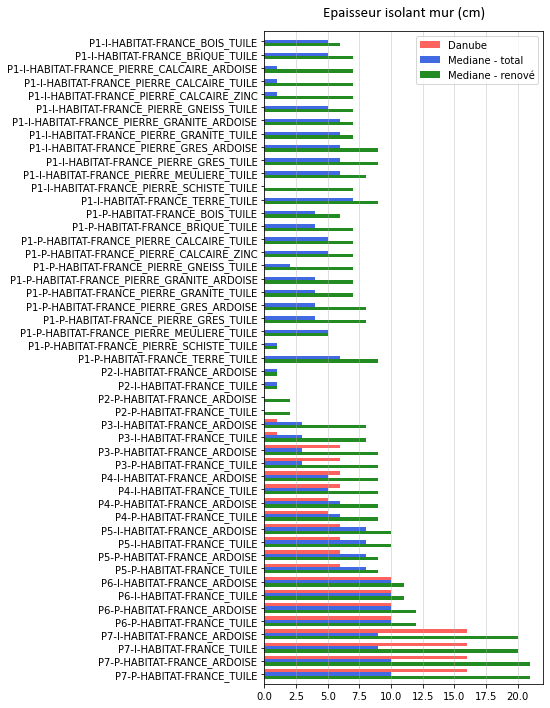

In [28]:
ind = np.arange(len(df_hab))
width = 0.25

fig, ax = plt.subplots(figsize=(5,12))

color_dan = '#fd625e'
color_dist =  'royalblue' #'#01b8aa'#'blueviolet'
color_renov = 'forestgreen'

ax.barh(ind, df_hab.EP_ISOLANT_M1, width, color=color_dan, label='Danube')
ax.barh(ind + width, df_hab.EP_ISOL_M1_dist_med, width, color=color_dist, label='Mediane - total')
ax.barh(ind + 2* width, df_hab.EP_ISOL_M1_renov_med, width, color=color_renov, label='Mediane - renové')


ax.set(yticks=ind + width, yticklabels=df_hab.archetype, ylim=[2*width - 1, len(df_hab)])
ax.invert_yaxis() 

ax.set_title("Epaisseur isolant mur (cm)", fontsize=15, pad=15, **hfont)
# ax.set_xlim(-2,22)
plt.grid(axis = 'x', alpha=0.5)
ax.legend()

plt.show()

path_epaisser = save_fig_path /"epaisseur_isolant_mur.png"
fig.savefig(path_epaisser)

In [13]:
list(df.columns)

['USAGE',
 'NOM_TYPOLOGIE',
 'PERIODE',
 'TERRITOIRE',
 'DISPOSITIF_M1',
 'PORTEUR_M1',
 'EP_PORTEUR_M1',
 'ISOLANT_M1',
 'EP_ISOLANT_M1',
 'REVETEMENT_INT_M1',
 'EP_RI_M1',
 'REVETEMENT_EXT_M1',
 'EP_RE_M1',
 'DISPOSITIF_M2',
 'PORTEUR_M2',
 'EP_PORTEUR_M2',
 'ISOLANT_M2',
 'EP_ISOLANT_M2',
 'REVETEMENT_INT_M2',
 'EP_RI_M2',
 'REVETEMENT_EXT_M2',
 'EP_RE_M2',
 'DISPOSITIF_M3',
 'PORTEUR_M3',
 'EP_PORTEUR_M3',
 'ISOLANT_M3',
 'EP_ISOLANT_M3',
 'REVETEMENT_INT_M3',
 'EP_RI_M3',
 'REVETEMENT_EXT_M3',
 'EP_RE_M3',
 'DISPOSITIF_T2',
 'PORTEUR_T2',
 'EP_PORTEUR_T2',
 'ISOLANT_T2',
 'EP_ISOLANT_T2',
 'REVETEMENT_INT_T2',
 'EP_RI_T2',
 'REVETEMENT_EXT_T2',
 'EP_RE_T2',
 'TERRITOIRE_SHORT_ID',
 'TERRITOIRE_DESC',
 'NUMERO_PERIODE',
 'DATES',
 'DATE_DEBUT',
 'DATE_FIN',
 'POURCENTAGE_VITRAGE',
 'TYPE_VITRAGE',
 'PROTECTIONS_SOLAIRES',
 'VENTILATION',
 'PERMEABILITE',
 'COUVERTURE_ROUTE',
 'COMPACITE',
 'ID_PLANCHER',
 'PLANCHER_RDC',
 'EP_PLANCHER_RDC',
 'PLANCHER_INTERMEDIAIRE',
 'EP_PLANCHER_

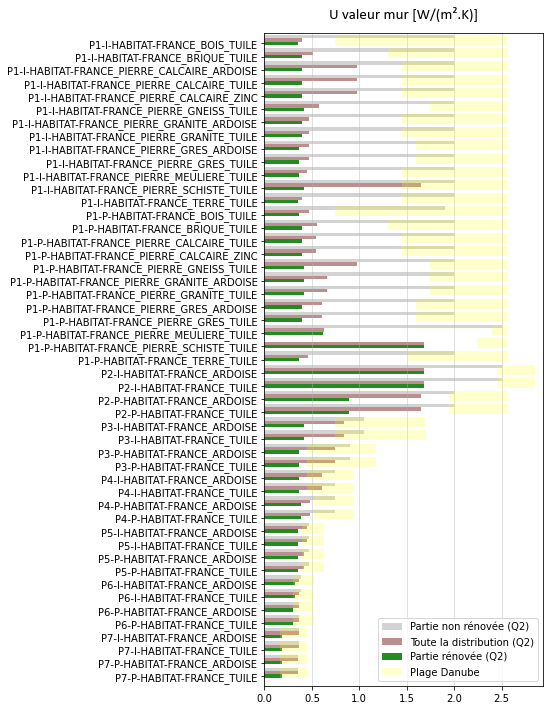

In [29]:
X_coords = np.array([df_hab.Uw_min, df_hab.Uw_max])
Y_coords = np.array([range(len(df_hab)), 
                    range(len(df_hab))])


ind = np.arange(len(df_hab))
width = 0.25

fig, ax = plt.subplots(figsize=(5,12))
# '#fd625e'
color_dan = 'yellow'
color_dist =  'rosybrown' #'#01b8aa'#'blueviolet'
color_renov = 'forestgreen'
color_non_rnv='lightgrey'

# ax.barh(ind, df_hab.Uw_min, width, color=color_dan, label='Uw_min')
ax.plot(X_coords, Y_coords, color=color_dan, alpha=0.2, linewidth=10)
ax.barh(ind -width , df_hab.nonrnv_wall_Q2, width, color=color_non_rnv, label='Partie non rénovée (Q2)')
ax.barh(ind , df_hab.dist_wall_Q2, width, color=color_dist, label='Toute la distribution (Q2)')
ax.barh(ind + width, df_hab.renov_wall_Q2, width, color=color_renov, label='Partie rénovée (Q2)')


ax.set(yticks=ind + width, yticklabels=df_hab.archetype, ylim=[2*width - 1, len(df_hab)])
ax.invert_yaxis() 

ax.set_title("U valeur mur [W/(m².K)]", fontsize=15, pad=15, **hfont)
# ax.set_xlim(-2,22)
plt.grid(axis = 'x', alpha=0.5)
# plt.grid(alpha=0.5)

def add_patch(legend):
    from matplotlib.patches import Patch
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Patch(facecolor=color_dan, alpha=0.2))
    labels.append("Plage Danube")

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())

lgd = ax.legend(loc='lower right')
add_patch(lgd)

plt.show()

path_U_mur = save_fig_path /"barh_U_mur.png"
fig.savefig(path_U_mur)

In [16]:
len(df)

53

### Toit

In [17]:
list(df.columns)

['USAGE',
 'NOM_TYPOLOGIE',
 'PERIODE',
 'TERRITOIRE',
 'DISPOSITIF_M1',
 'PORTEUR_M1',
 'EP_PORTEUR_M1',
 'ISOLANT_M1',
 'EP_ISOLANT_M1',
 'REVETEMENT_INT_M1',
 'EP_RI_M1',
 'REVETEMENT_EXT_M1',
 'EP_RE_M1',
 'DISPOSITIF_M2',
 'PORTEUR_M2',
 'EP_PORTEUR_M2',
 'ISOLANT_M2',
 'EP_ISOLANT_M2',
 'REVETEMENT_INT_M2',
 'EP_RI_M2',
 'REVETEMENT_EXT_M2',
 'EP_RE_M2',
 'DISPOSITIF_M3',
 'PORTEUR_M3',
 'EP_PORTEUR_M3',
 'ISOLANT_M3',
 'EP_ISOLANT_M3',
 'REVETEMENT_INT_M3',
 'EP_RI_M3',
 'REVETEMENT_EXT_M3',
 'EP_RE_M3',
 'DISPOSITIF_T2',
 'PORTEUR_T2',
 'EP_PORTEUR_T2',
 'ISOLANT_T2',
 'EP_ISOLANT_T2',
 'REVETEMENT_INT_T2',
 'EP_RI_T2',
 'REVETEMENT_EXT_T2',
 'EP_RE_T2',
 'TERRITOIRE_SHORT_ID',
 'TERRITOIRE_DESC',
 'NUMERO_PERIODE',
 'DATES',
 'DATE_DEBUT',
 'DATE_FIN',
 'POURCENTAGE_VITRAGE',
 'TYPE_VITRAGE',
 'PROTECTIONS_SOLAIRES',
 'VENTILATION',
 'PERMEABILITE',
 'COUVERTURE_ROUTE',
 'COMPACITE',
 'ID_PLANCHER',
 'PLANCHER_RDC',
 'EP_PLANCHER_RDC',
 'PLANCHER_INTERMEDIAIRE',
 'EP_PLANCHER_

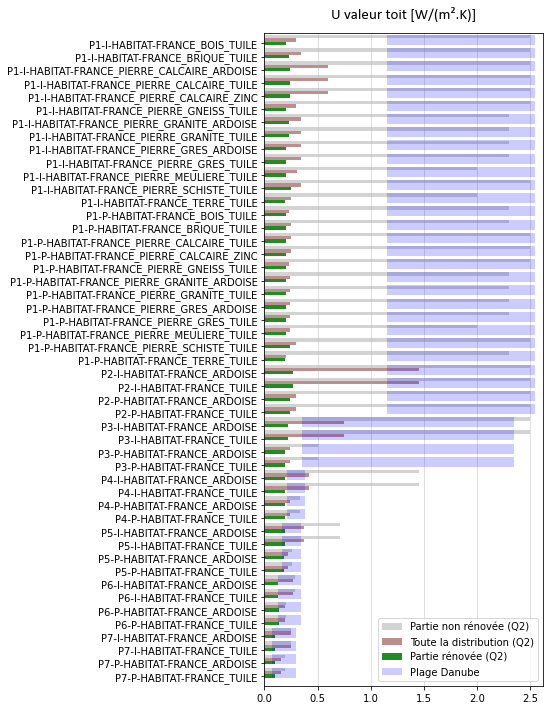

In [30]:
X_coords = np.array([df_hab.Uph_min, df_hab.Uph_max])
Y_coords = np.array([range(len(df_hab)), 
                    range(len(df_hab))])


ind = np.arange(len(df_hab))
width = 0.25

fig, ax = plt.subplots(figsize=(5,12))
# '#fd625e'
color_dan = 'blue'
color_dist =  'rosybrown' #'#01b8aa'#'blueviolet'
color_renov = 'forestgreen'
color_non_rnv='lightgrey'

# ax.barh(ind, df_hab.Uw_min, width, color=color_dan, label='Uw_min')
ax.plot(X_coords, Y_coords, color=color_dan, alpha=0.2, linewidth=10)
ax.barh(ind -width , df_hab.nonrnv_roof_Q2, width, color=color_non_rnv, label='Partie non rénovée (Q2)')
ax.barh(ind , df_hab.dist_roof_Q2, width, color=color_dist, label='Toute la distribution (Q2)')
ax.barh(ind + width, df_hab.renov_roof_Q2, width, color=color_renov, label='Partie rénovée (Q2)')


ax.set(yticks=ind + width, yticklabels=df_hab.archetype, ylim=[2*width - 1, len(df_hab)])
ax.invert_yaxis() 

ax.set_title("U valeur toit [W/(m².K)]", fontsize=15, pad=15, **hfont)
# ax.set_xlim(-2,22)
plt.grid(axis = 'x', alpha=0.5)
# plt.grid(alpha=0.5)

def add_patch(legend):
    from matplotlib.patches import Patch
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Patch(facecolor=color_dan, alpha=0.2))
    labels.append("Plage Danube")

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())

lgd = ax.legend(loc='lower right')
add_patch(lgd)

plt.show()

path_U_toit = save_fig_path /"barh_U_toit.png"
fig.savefig(path_U_toit)